In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#Question 1

In [2]:
#1.1
#读取.tsv文件
Sig_Eqs = pd.read_csv("D:\ESE_5023\earthquakes-2023-11-01_21-34-06_+0800.tsv", sep='\t')
#根据国家分类并计算各国家死亡人数总和
T_Deaths = Sig_Eqs.groupby("Country")["Deaths"].sum()
print(T_Deaths)
#根据各国家死亡人数总和进行升序排列
Top_ten = T_Deaths.sort_values(ascending=True)
#打印出最大的10个数
print(Top_ten.tail(10))

Country
AFGHANISTAN                             15644.0
ALBANIA                                  3132.0
ALGERIA                                 39339.0
ANTARCTICA                                  0.0
ANTIGUA AND BARBUDA                         0.0
                                         ...   
VENEZUELA                               44480.0
VIETNAM                                     0.0
WALLIS AND FUTUNA (FRENCH TERRITORY)        5.0
YEMEN                                    4192.0
ZAMBIA                                      0.0
Name: Deaths, Length: 156, dtype: float64
Country
PAKISTAN       145083.0
ARMENIA        191890.0
JAPAN          279085.0
AZERBAIJAN     317219.0
HAITI          323478.0
SYRIA          439224.0
ITALY          498478.0
IRAN          1011449.0
TURKEY        1188881.0
CHINA         2075045.0
Name: Deaths, dtype: float64


Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2019.0    27
 2020.0    15
 2021.0    23
 2022.0    20
 2023.0    22
Name: Mag, Length: 536, dtype: int64


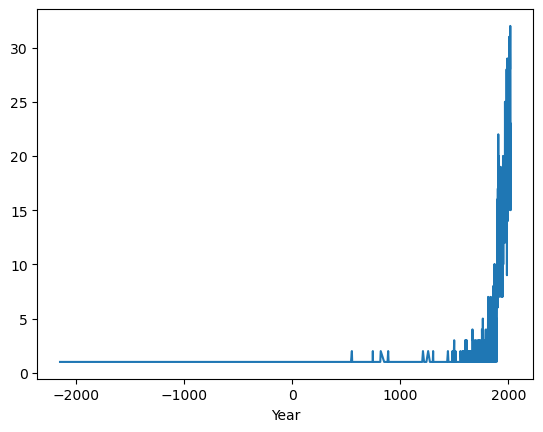

In [3]:
#1.2
#建立Mag大于6.0的df
T_magnitude = Sig_Eqs[Sig_Eqs["Mag"]>6.0]
#将df按照Year进行分类并依照时间区分出Mag大于6.0的数量
T_magnitude_years =T_magnitude.groupby("Year")["Mag"].count()
print(T_magnitude_years)
#将时间与震级>6.0的数量画折线图
T_magnitude_years.plot(x="Year", y="T_magnitude", kind="line")
plt.show()

In [4]:
#1.3
def CountEq_LargestEq(country):
    # 过滤出指定国家的地震数据
    country_data = Sig_Eqs[Sig_Eqs['Country'] == country]
    total_eqs = len(country_data)
    # 找到该国家历史上最大的地震的日期
    largest_earthquake = Sig_Eqs[Sig_Eqs['Mag'] == Sig_Eqs['Mag'].max()]
#  largest_earthquake = country_data.iloc[country_data['Mag'].idxmax()]   不明白和上一行有啥不一样
    date_of_largest_earthquake = largest_earthquake['Year']
    #调出总数与日期
    return (total_eqs, date_of_largest_earthquake)
#建立一个结果
results = []
# 选定每个国家并调用函数
country = input("Input the country:")
# for country in unique_countries:
total_eqs, date_of_largest_earthquake = CountEq_LargestEq(country)
print(total_eqs, date_of_largest_earthquake)
print("================================")
countries = set(Sig_Eqs['Country'])
#     date_of_largest_earthquake = CountEq_LargestEq(country)
#历遍国家
for country in countries:
    total_eqs, date_of_largest_earthquake = CountEq_LargestEq(country)
    results.append((country, total_eqs, date_of_largest_earthquake))
# 按地震总数降序排列结果
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)
for country, total_eqs, date_of_largest_earthquake in results:
    print(f"国家: {country}, 总地震数: {total_eqs}, 最大地震日期: {date_of_largest_earthquake}")

Input the country:CHINA
620 3845    1960.0
Name: Year, dtype: float64
国家: NEPAL, 总地震数: 19, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: GUATEMALA, 总地震数: 39, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: CUBA, 总地震数: 14, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: CHILE, 总地震数: 198, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: AZORES (PORTUGAL), 总地震数: 27, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: LAOS, 总地震数: 2, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: SOLOMON SEA, 总地震数: 2, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: FRANCE, 总地震数: 43, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: DOMINICAN REPUBLIC, 总地震数: 18, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: MYANMAR (BURMA), 总地震数: 34, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: GEORGIA, 总地震数: 15, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: EGYPT, 总地震数: 15, 最大地震日期: 3845    1960.0
Name: Year, dtype: float64
国家: SRI LANKA, 总地震数: 1, 最大地震日期: 3

In [ ]:
#Question 2

C:\Users\dell\AppData\Local\Temp\ipykernel_22104\1471617079.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data["speed"] = winds


111984
105621


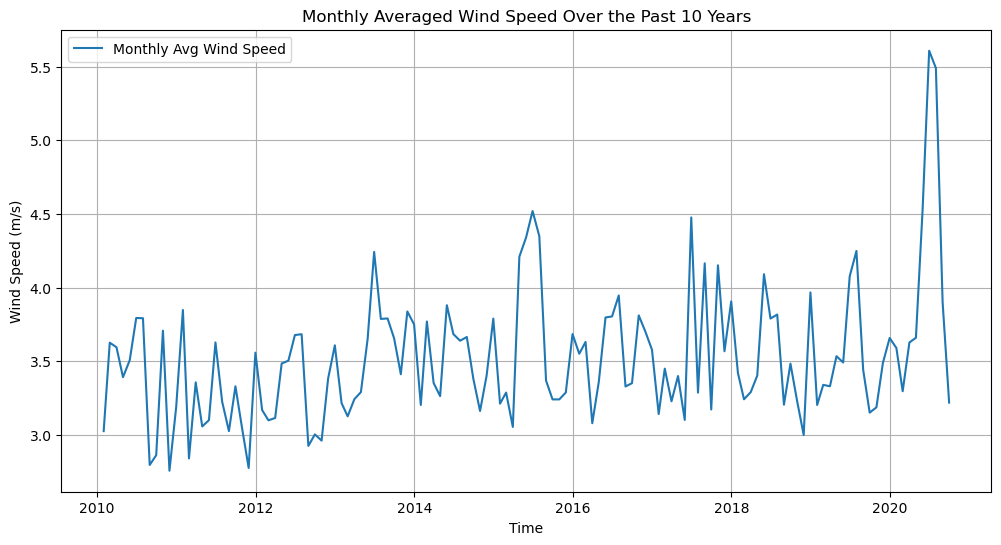

In [5]:
#consult with liu qiming
wind_speed = pd.read_csv("2281305.csv",low_memory = False)
wind_data = wind_speed[['DATE', 'WND']]
#新建一个表之后加入df中
winds = []
#使用，将WND中的值分开，并选出0000系列的值，并且不是9999的missing
for id,row in wind_data.iterrows():
    wind = row["WND"]
    a = wind.split(",")
    #选中真实值是为1的数
    if int(a[4]) == 1 and int(a[0])!=999:
        winds.append(int(a[3])/10)
    else: 
        winds.append(np.nan)

# print(winds)检验winds
wind_data["speed"] = winds
print(len(wind_data))
#https://blog.csdn.net/qq_17753903/article/details/89817371
wind_data = wind_data.dropna()
print(len(wind_data))
#判断是否除去空值
#https://zhuanlan.zhihu.com/p/277364792
wind_data['DATE'] = pd.to_datetime(wind_data['DATE'])
#https://zhuanlan.zhihu.com/p/277364792
monthly_avg_wind_speed = wind_data.resample('M', on='DATE')['speed'].mean()
# df = wind_data[["DATE","speed"]]
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_wind_speed.index, monthly_avg_wind_speed, label='Monthly Avg Wind Speed')
plt.title('Monthly Averaged Wind Speed Over the Past 10 Years')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Question 3

In [9]:
#3.1
#来自课题组外场观测的数据
df = pd.read_excel("20230308_Ozone.xlsx")
#除去因为仪器偏差造成ozone浓度小于0
df = df[df["Conc."]>0]
df

,Conc.,T,P,Date,Time
0,2.8,24.0,938.7,2023-03-08,19:52:27
1,2.8,24.6,938.9,2023-03-08,19:53:27
2,2.2,25.1,940.0,2023-03-08,19:54:27
3,1.7,25.6,940.1,2023-03-08,19:55:27
4,5.0,26.1,940.5,2023-03-08,19:56:27
...,...,...,...,...,...
753,432.7,36.1,937.9,2023-03-09,08:27:36
754,432.5,36.1,937.8,2023-03-09,08:28:36
755,433.1,36.2,937.8,2023-03-09,08:29:36
756,433.5,36.2,937.8,2023-03-09,08:30:36


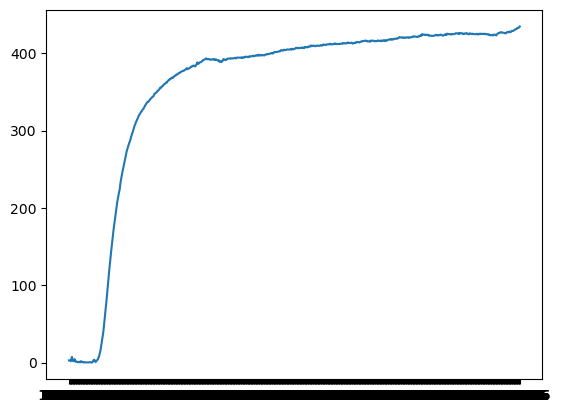

In [7]:
#3.2
#以时间序列中ozone的浓度变化画图  其中astype（str)是改变Time的数据结构
plt.plot(df["Time"].astype(str) , df["Conc."] )
plt.show()

In [8]:
#3.3
a = df["Conc."].describe()
b = df["T"].mean()
c = df["P"].mean()
d = df["T"].max()
e = df["T"].min()
print(a,b,c,d,e)

count    728.000000
mean     358.698214
std      118.287084
min        0.100000
25%      376.400000
50%      405.800000
75%      420.525000
max      434.600000
Name: Conc., dtype: float64 35.29615384615385 938.2508241758242 36.2 24.0
